# Tutorial for Epidemic Outbreak Modeling & Prediction

**Author:** Souvik Manik, Sabyasachi Pal, Manoj Mandal

**Prerequisites:** Epitools, Numpy, Pandas, sklearn, matplotlib 

**Description:** Epidemic outbreak modelling can be done with ``EpiGrowthModel`` class of our ``Epitools``, as shown in the flowchart. In the initial stages of any epidemic the growth rate is likely exponential after some time it follows logistic curve now we will try to fit our data with different growth models (Exponential, logistic) in the following way:

In [2]:
#import essential libratries
import pandas as pd 
from matplotlib import dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from epitools.growth_models import EpiGrowthModel

In [8]:
#read the epidemic data, here we are using a test data hosted on github
df = pd.read_csv('https://raw.githubusercontent.com/souvikmanik/covid_data/main/india.csv')
df.head(4)

,Unnamed: 0,date,Confirmed,Recovered,Death
0,2021-02-01,2021-02-01,10766245,10448406,154486
1,2021-02-02,2021-02-02,10777284,10462631,154596
2,2021-02-03,2021-02-03,10790183,10480455,154703
3,2021-02-04,2021-02-04,10802591,10496308,154823


In [10]:
# derived data
cum_positive = df.Confirmed.values
y_train, y_test = cum_positive[:90], cum_positive[90:105]
cum_positives1 = cum_positive[:190]

## 1. Initial outbreak modelling using Exponential function

$$
f(x) = a \cdot e^{b x} + c
$$

In [12]:
model1 = EpiGrowthModel('exponential', normalize=True, calc_ci=True)
model1.fit(y_train)
x1, fitted1 = model1.get_fitted
x_pred, y_pred = model1.predict(15)
model1.fit_report

Exponetial function normalized parameters 
------------------------------------------ 
x ∈ [0, 1] and y ∈ [0, 1] where y=f(x) 
------------------------------------------
Parameter	Value
a    	    0.00554
b    	    5.21899
c    	    0.00567

goodness-of-fit 
--------------- 
[fitted] RMSD = 68898.90399750575
[fitted] R2 = 0.9990661431280201
------------------------------------------ 
Thank you for using epitools!


## 2. Outbreak modelling using modified logistic growth model

$$
f(x) = \frac{a}{1 + e^{-c \cdot (x - d) + b}}
$$

In [13]:
model2 = EpiGrowthModel('logistic', normalize=True, calc_ci=True)
model2.fit(cum_positives1)
x2, fitted2 = model2.get_fitted
model2.fit_report

Logistic function normalized parameters 
------------------------------------------ 
x ∈ [0, 1] and y ∈ [0, 1] where y=f(x) 
------------------------------------------
Parameter	Value
a    	    0.95990
b    	    0.00332
c    	   13.35303
d    	    0.50663

goodness-of-fit 
--------------- 
[fitted] RMSD = 256241.21984567365
[fitted] R2 = 0.9990849305117291
------------------------------------------ 
Thank you for using epitools!


Text(0.5, 1.0, 'Fitting and prediction different outbreak models using epitools')

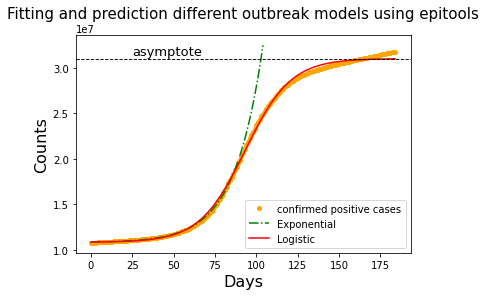

In [16]:
plt.figure(figsize=(6,4))
plt.plot(x2, cum_positives1, '.', markersize=8, color='orange', label='confirmed positive cases')
plt.plot(x1, fitted1[1], '-.', color='green')
plt.plot(x_pred, y_pred[1], '-.', color='green', label='Exponential')
plt.plot(x2, fitted2[1], '-', color='red', label='Logistic')
plt.legend()
plt.xlabel('Days', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.axhline(3.103e7, color='k',lw=0.9, linestyle='--')
plt.text(25,3.14e7, 'asymptote', color='k',fontsize=13)
plt.title('Fitting and prediction different outbreak models using epitools',fontsize=15)